<a href="https://colab.research.google.com/github/british2002/tsml-18/blob/main/%D0%94%D0%97_%D0%9E%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание


1.   Скачайте материалы к занятию.
2.   Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными:
*   monthly-sales-of-company-x-jan-6.csv
*   monthly-boston-armed-robberies-j.csv
*   international-airline-passengers.csv
*   mean-monthly-air-temperature-deg.csv
*   weekly-closings-of-the-dowjones-.csv
*   daily-total-female-births-in-cal.csv
3.   Пришлите решение в виде ссылки на GitHub с ноутбуком.

# Часть 0. Подготовка данных

In [1]:
#импортируем пакеты для дальнейшей работы
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
#загружаем данные для анализа и работы
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [3]:
#определим функцию Дики-Фуллера
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
#определим функцию построения графиков (оригинал, автокорреляция, парной автокорреляции)
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# Часть 1. Анализ и преобразование ряда "Продажи в компании Х"

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


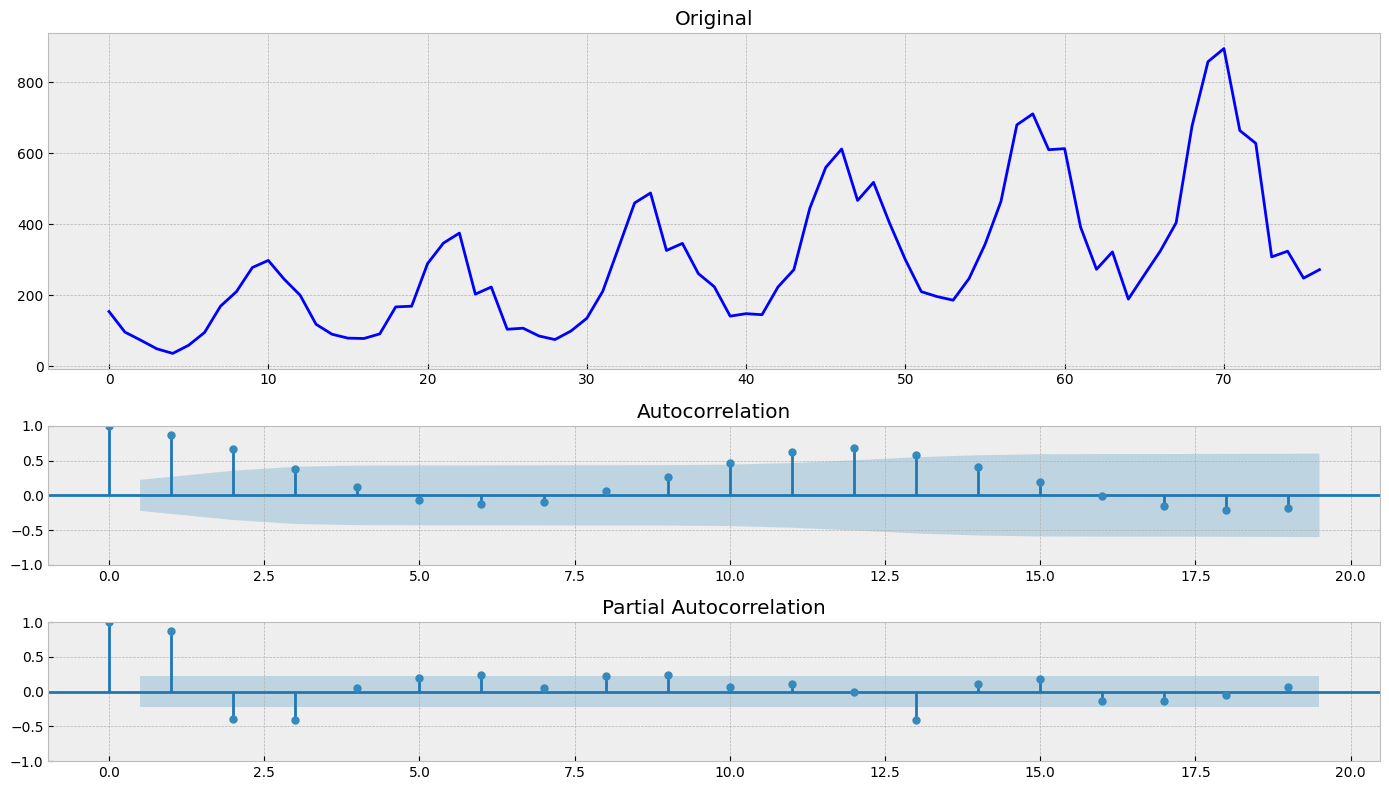

In [5]:
#проанализируем данные в monthly-sales-of-company-x-jan-6.csv
series = sales_of_company_x['Count']
tsplot(series)

**Выводы по первоначальным данным**

1.   По графику данных (Original) отчетливо видны тренд на увеличение и цикличность
2.   По графику автокорреляции происходит постепенное убывание значений.


РЕЗЮМЕ: Исходный график нестационарный




In [6]:
#нормализуем дисперсию
series = boxcox(series, 0)

In [7]:
#проведем дифференцирование
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


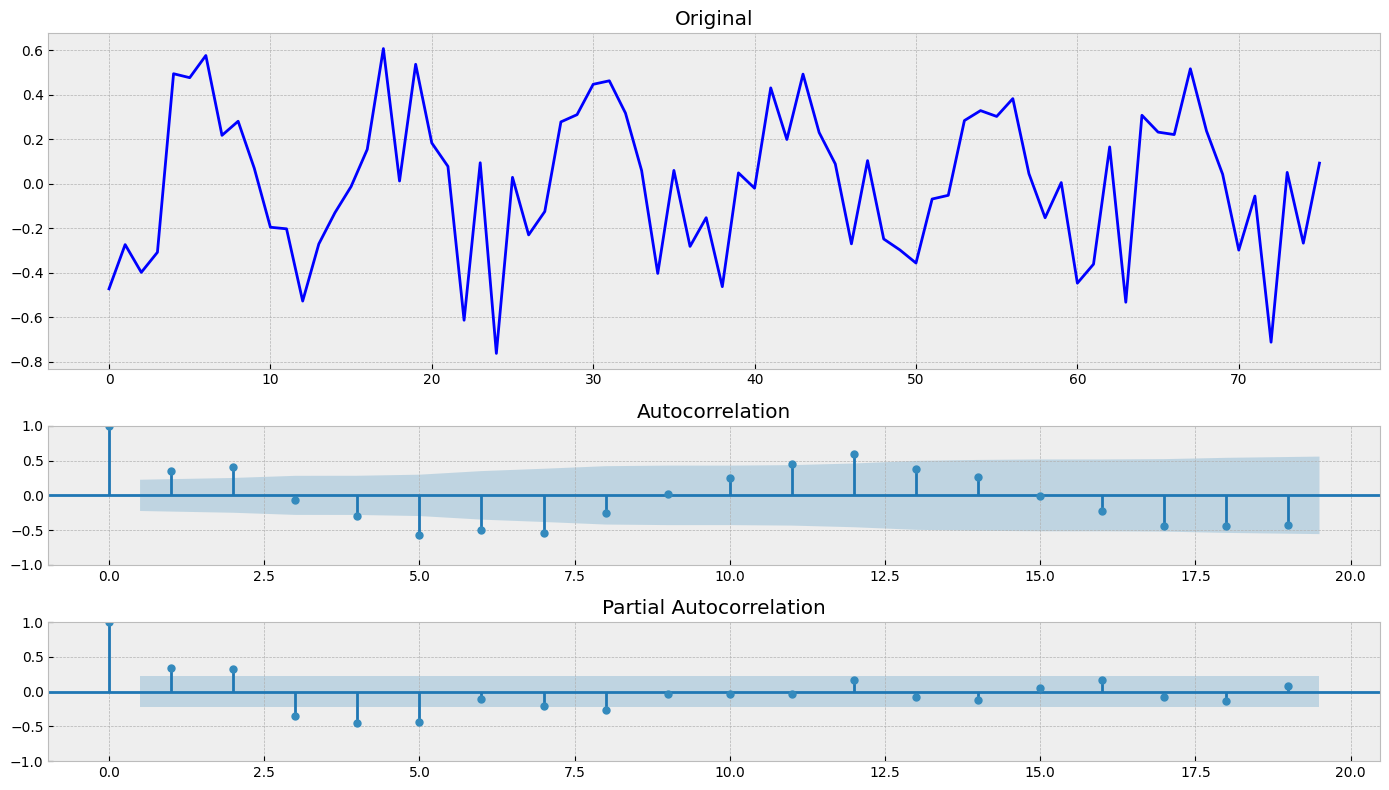

In [8]:
#повторно проанализируем измененный ряд
tsplot(series)

**Выводы по измененным данным**

1.   На графике данных (Original) нельзя отчетливо определить тренд и цикл, сезонность.
2.   По графику автокорреляции происходит резкое изменение значений.
3.   Значение p-value < 0.05

РЕЗЮМЕ: Измененный график стационарный

# Часть 2. Анализ и преобразование ряда "Грабежи в Бостоне"

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


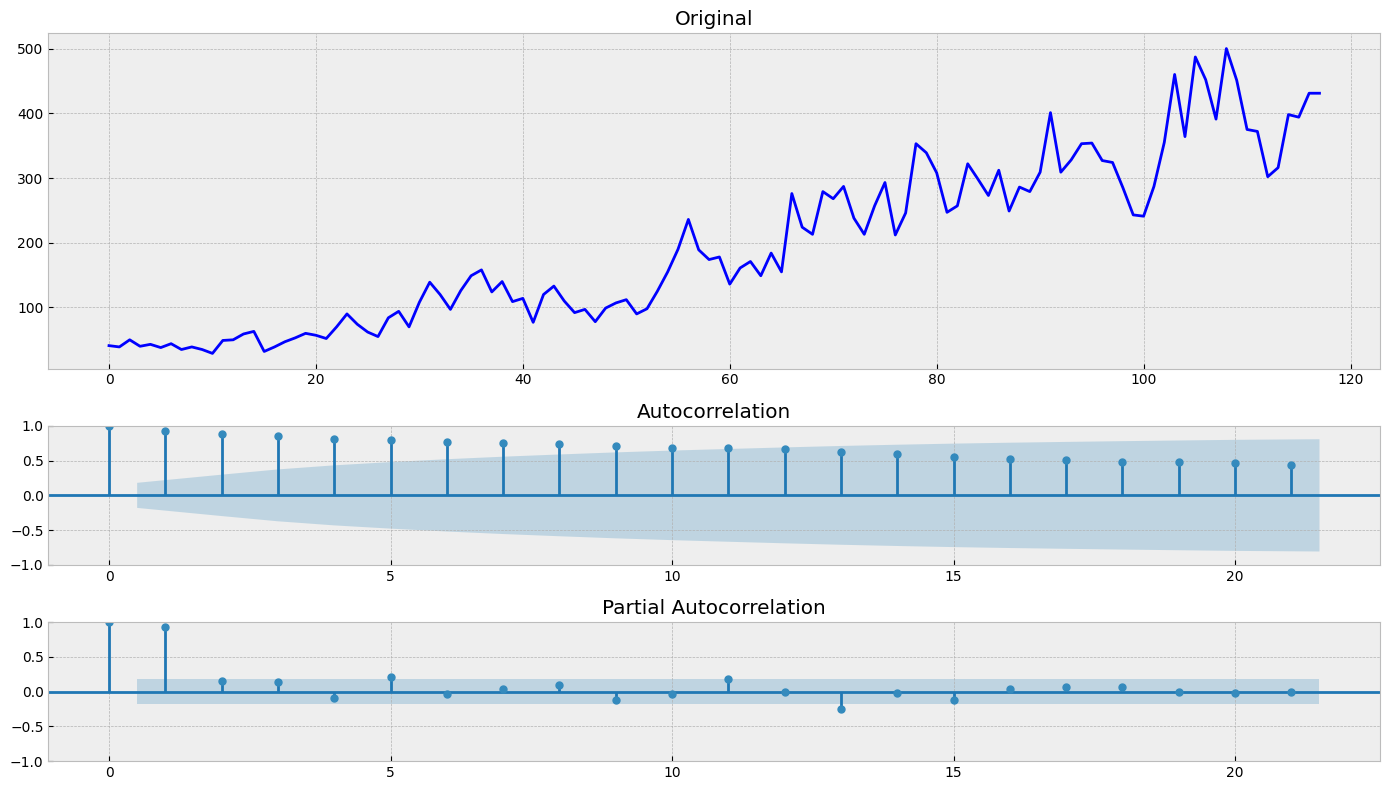

In [9]:
#проанализируем данные в monthly-boston-armed-robberies-j.csv
series = robberies_in_boston['Count']
tsplot(series)

**Выводы по первоначальным данным**

1.   По графику данных (Original) отчетливо видны тренд на увеличение и некая цикличность. Также присутсвует ошибка/сдвиг со временем.
2.   По графику автокорреляции происходит постепенное убывание значений.


РЕЗЮМЕ: Исходный график нестационарный


In [10]:
#нормализуем дисперсию
series = boxcox(series, 0)

In [11]:
#проведем дифференцирование
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


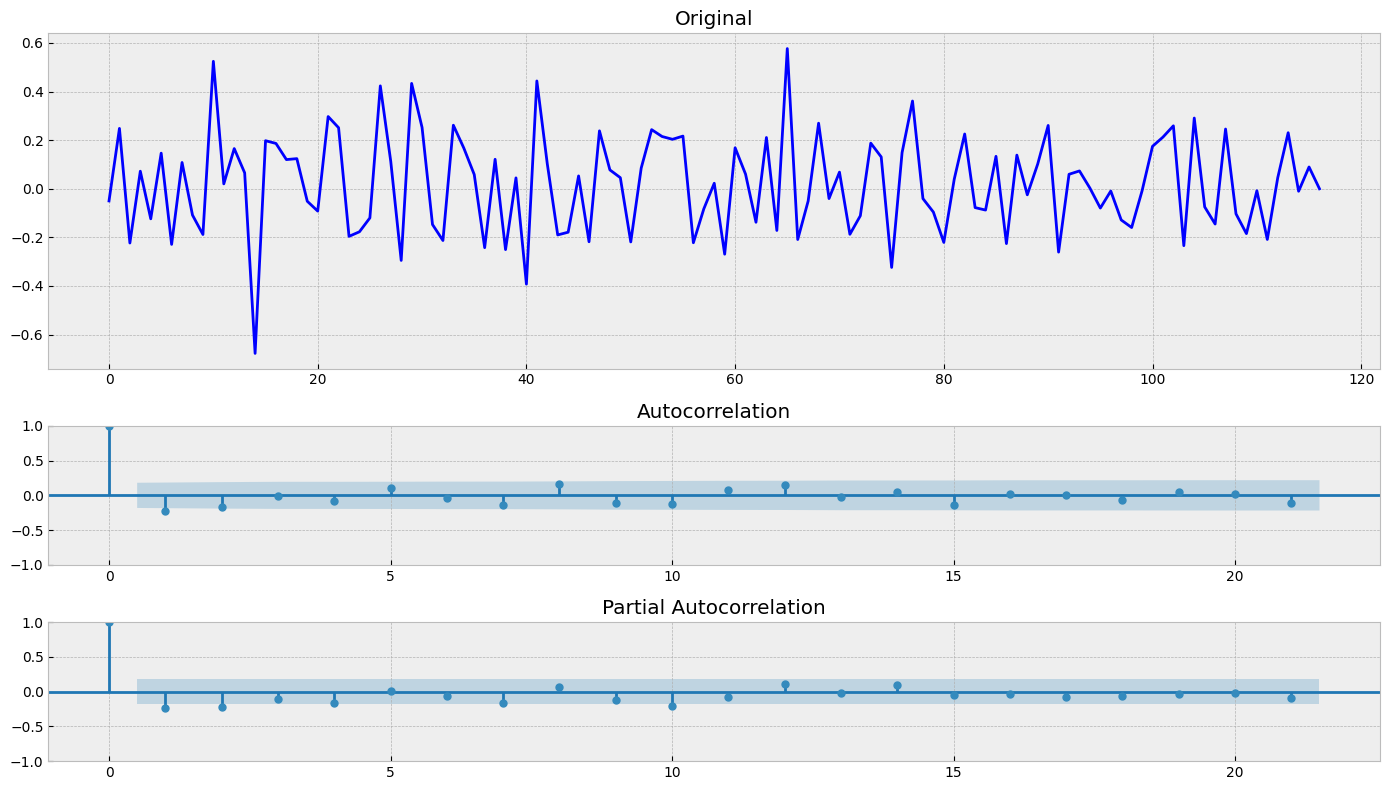

In [12]:
#повторно проанализируем измененный ряд
tsplot(series)

**Выводы по измененным данным**

1.   На графике данных (Original) нельзя отчетливо определить тренд и цикл, сезонность.
2.   По графику автокорреляции происходит резкое изменение значений.
3.   Значение p-value < 0.05


РЕЗЮМЕ: Измененный график стационарный

# Часть 3. Анализ и преобразование ряда "Статистика международных авиаперевозок"

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


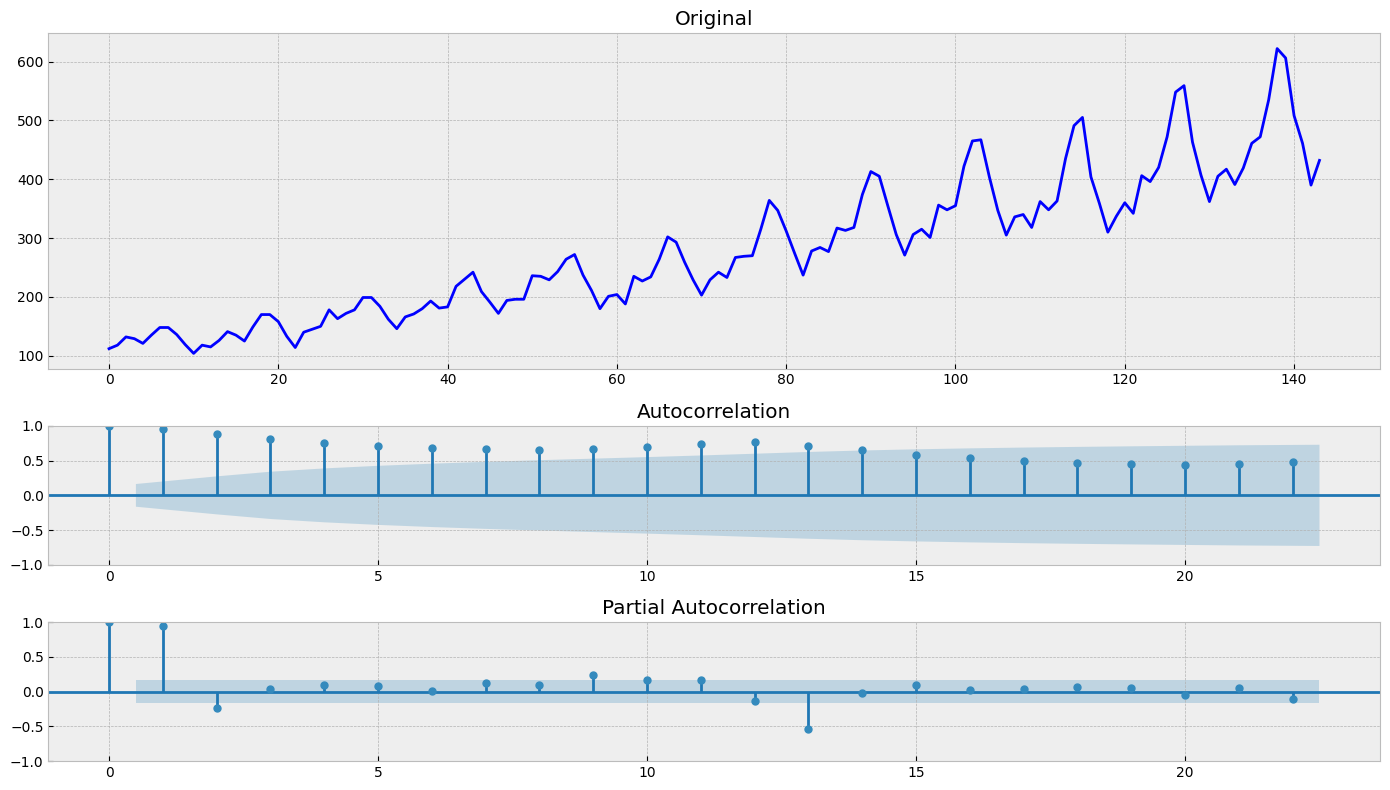

In [13]:
#проанализируем данные в international-airline-passengers.csv
series = airlines_passengers['Count']
tsplot(series)

**Выводы по первоначальным данным**

1.   По графику данных (Original) отчетливо видны тренд на увеличение и сезонность. Также присутсвует ошибка/сдвиг со временем.
2.   По графику автокорреляции происходит постепенное изменение значений.


РЕЗЮМЕ: Исходный график нестационарный

In [14]:
#нормализуем дисперсию
series = boxcox(series, 0)

In [15]:
#проведем дифференцирование
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


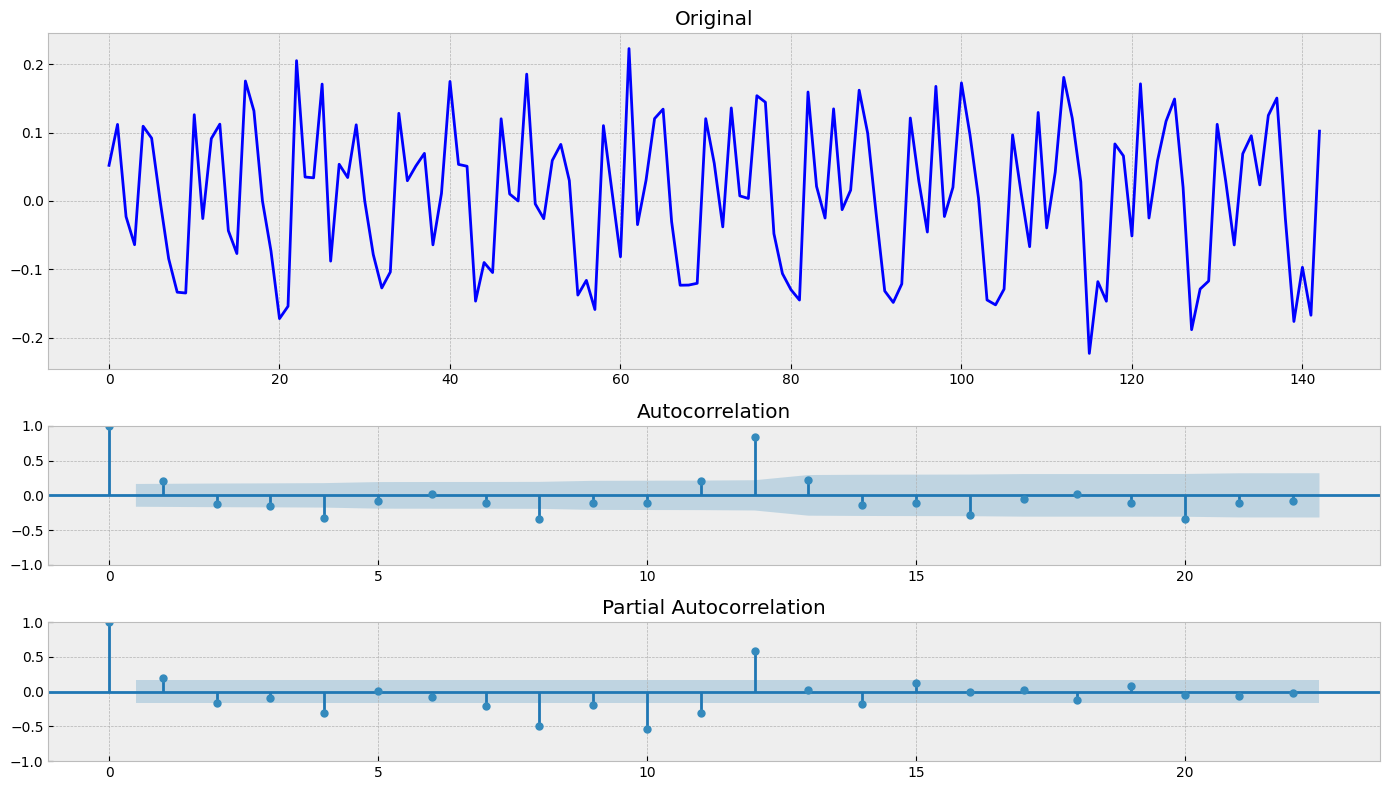

In [16]:
#повторно проанализируем измененный ряд
tsplot(series)

Значение p-value > 0.05, а Test Statistic > Critical Value (1%). Полученный временной ряд все еще не стационарен, потому повторно дифференцируем его.

In [17]:
#проведем повторное дифференцирование
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


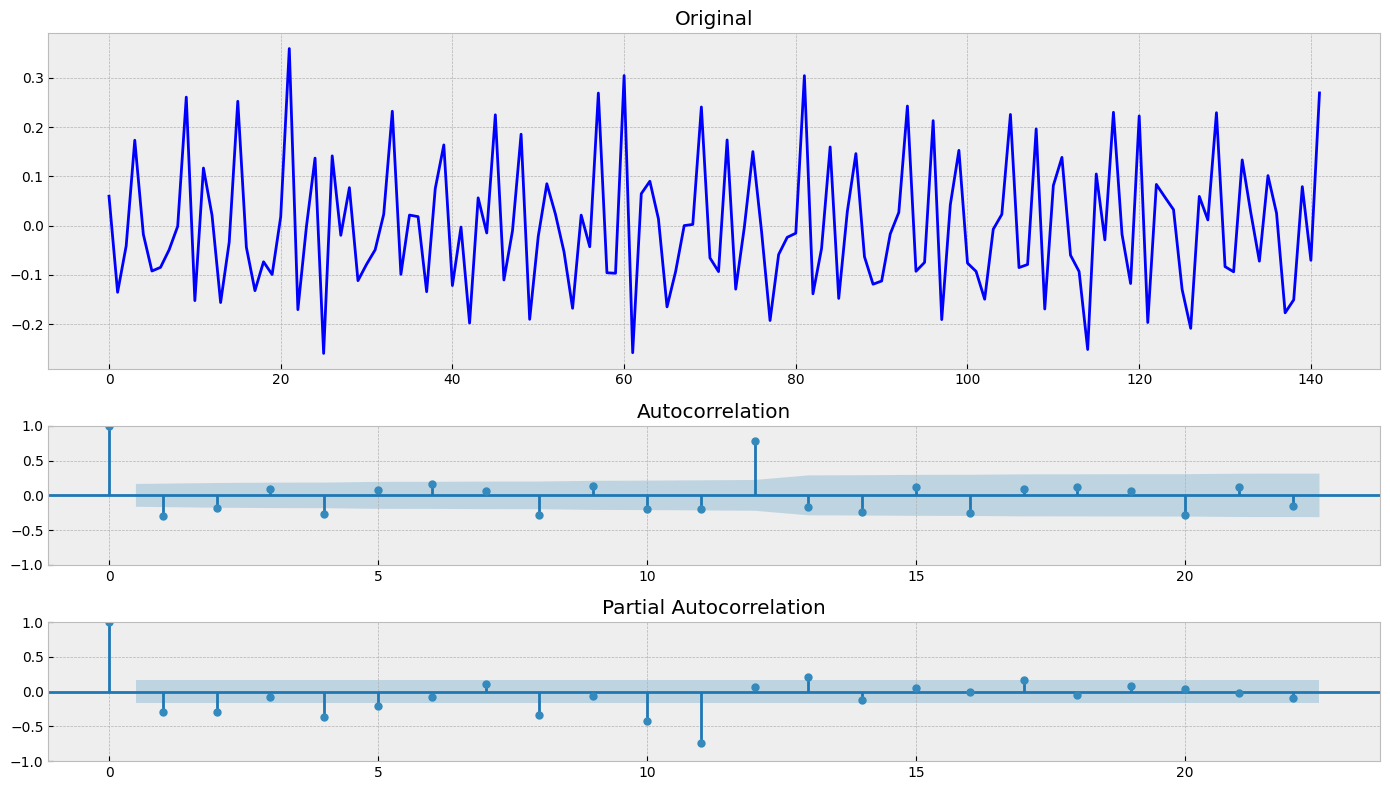

In [18]:
#повторно проанализируем измененный ряд
tsplot(series)

**Выводы по измененным данным**

1.   На графике данных (Original) нельзя отчетливо определить тренд и сезонность.
2.   По графику автокорреляции происходит резкое изменение значений.
3.   Значение p-value < 0.05





РЕЗЮМЕ: Измененный график стационарный

# Часть 4. Анализ и преобразование ряда "Средняя температура воздуха"

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


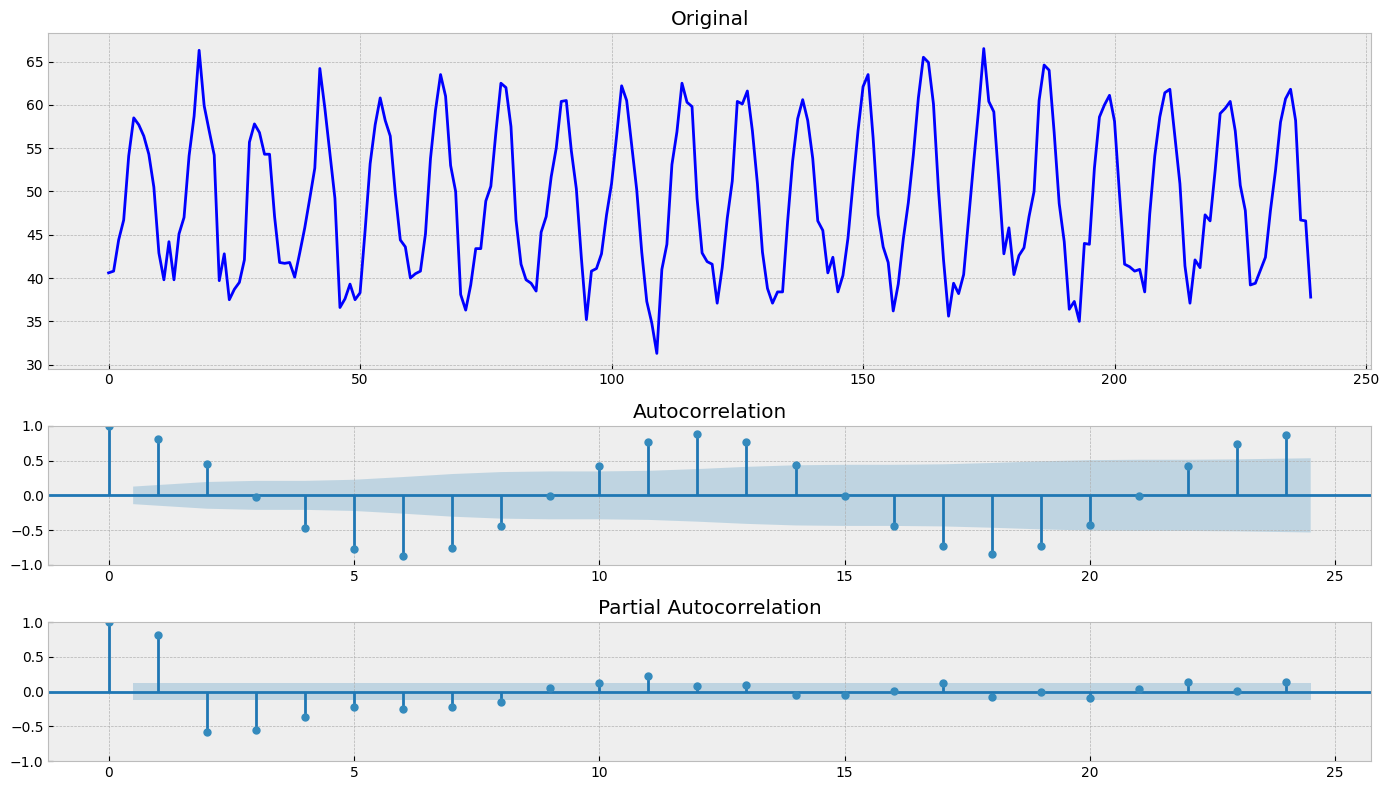

In [19]:
#проанализируем данные в mean-monthly-air-temperature-deg.csv
series = mean_monthly_temp['Deg']
tsplot(series)

**Выводы по первоначальным данным**

1.   По графику данных (Original) отчетливо видны цикличность и сезонность.
2.   По графику автокорреляции происходит постепенное изменение значений.
3.   Хотя p-value < 0.05, но Test Statistic > Critical Value (1%)

РЕЗЮМЕ: Исходный график нестационарный

In [20]:
#проведем дифференцирование
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.225927e+01
p-value                        9.157883e-23
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


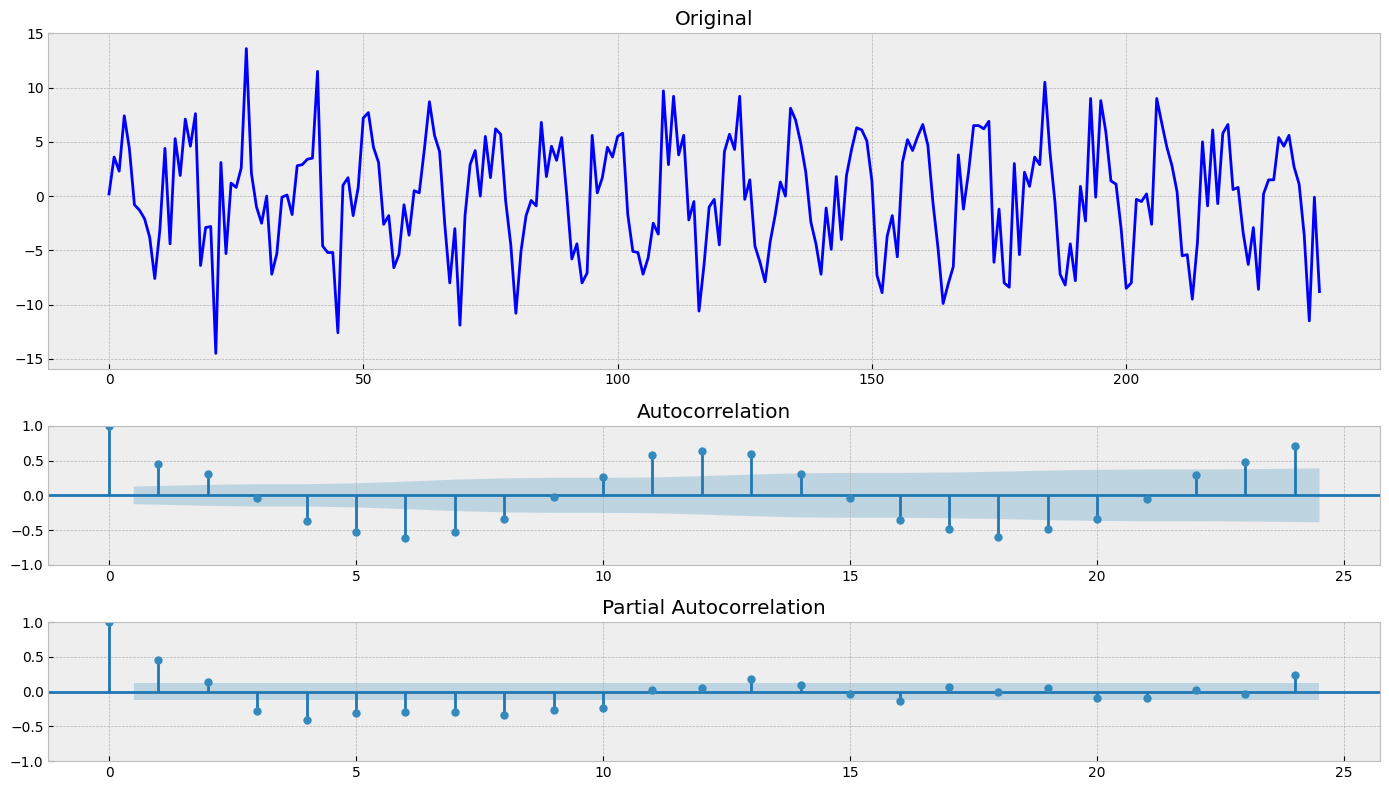

In [21]:
#повторно проанализируем измененный ряд
tsplot(series)

**Выводы по измененным данным**

1.   На графике данных (Original) нельзя отчетливо определить тренд и сезонность.
2.   Значение p-value < 0.05


РЕЗЮМЕ: Измененный график стационарный

# Часть 5. Анализ и преобразование ряда "Еженедельное закрытие торгов индекса Доу Джонса"

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


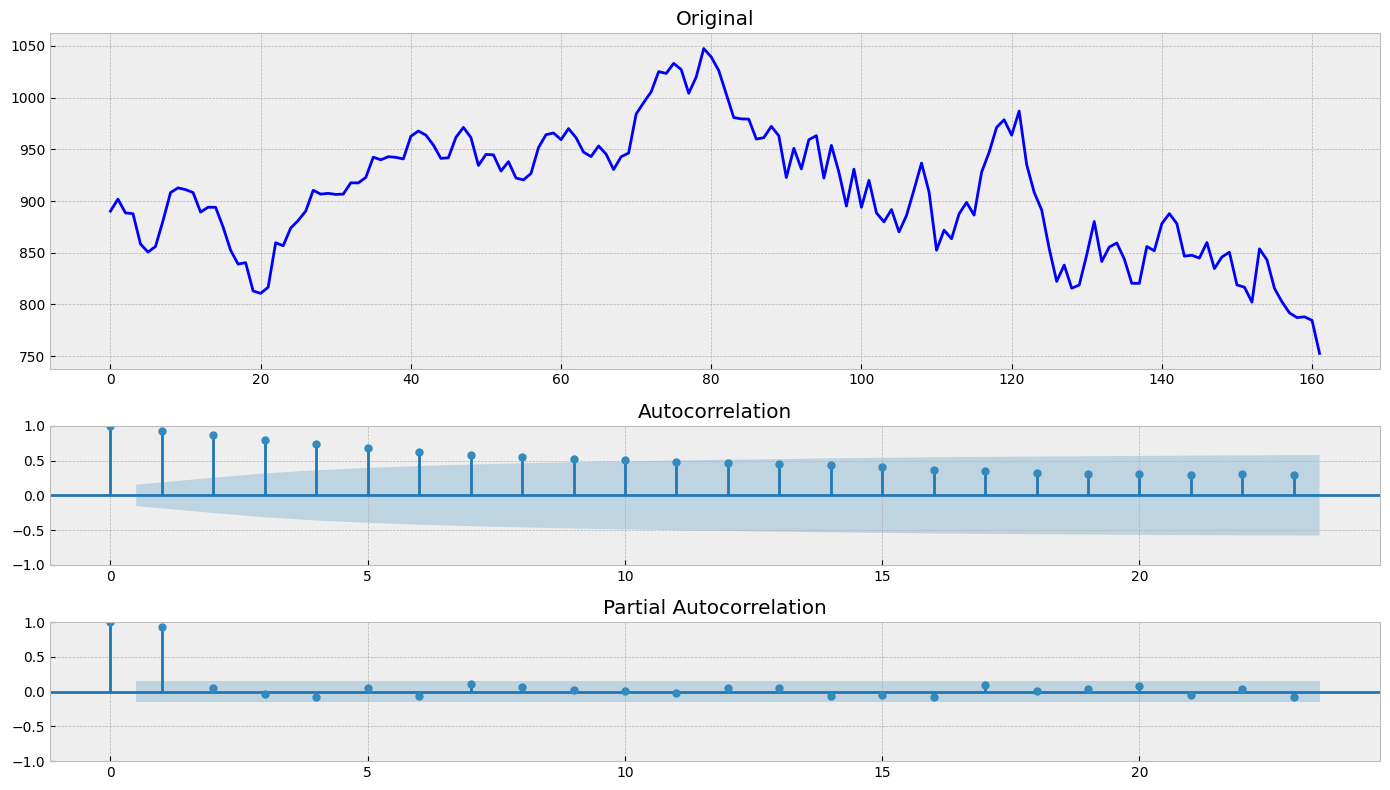

In [22]:
#проанализируем данные в  weekly-closings-of-the-dowjones-.csv
series = dowjones_closing['Close']
tsplot(series)

**Выводы по первоначальным данным**

1.   По графику данных (Original) можно определить тренд на понижение, есть некие признаки цикличности.
2.   По графику автокорреляции происходит постепенное изменение значений.
3.   p-value > 0.05, а также Test Statistic > Critical Value (1%)

РЕЗЮМЕ: Исходный график нестационарный

In [23]:
#проведем дифференцирование
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


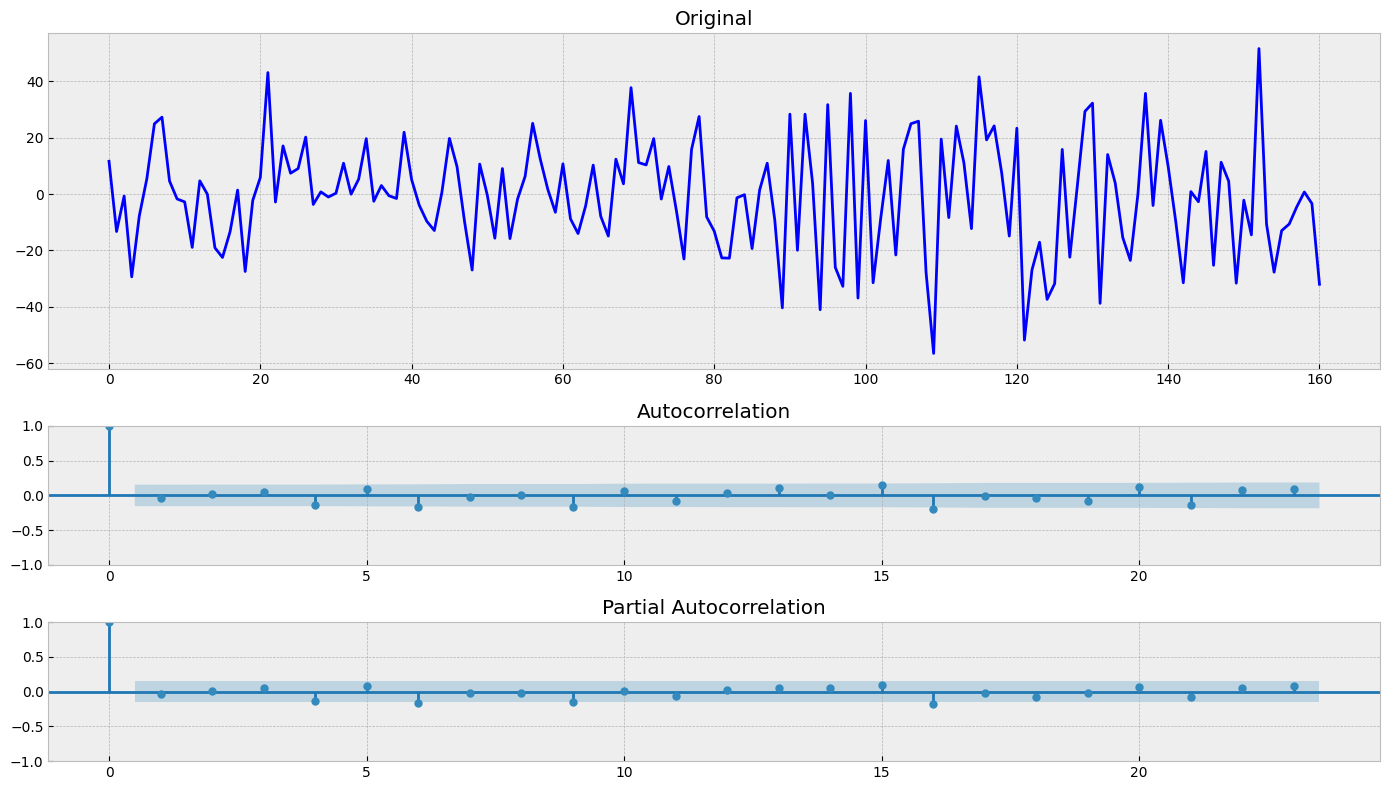

In [24]:
#повторно проанализируем измененный ряд
tsplot(series)

**Выводы по измененным данным**

1.   На графике данных (Original) нельзя отчетливо определить тренд, цикличность или сезонность.
2.   Значение p-value < 0.05


РЕЗЮМЕ: Измененный график стационарный

# Часть 6. Анализ и преобразование ряда "Новорожденные девочки в Калифорнии"

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


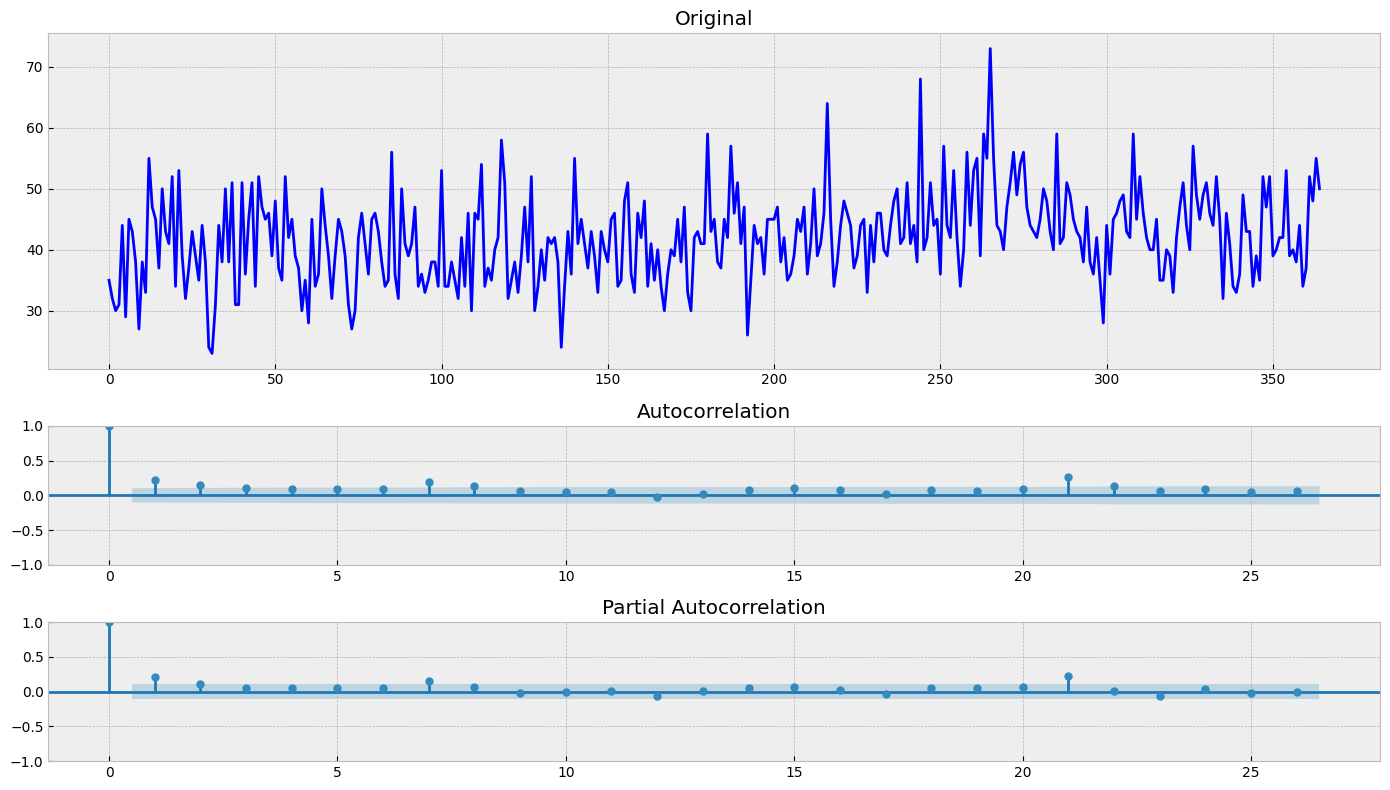

In [25]:
#проанализируем данные в  daily-total-female-births-in-cal.csv
series = female_births['Count']
tsplot(series)

**Выводы по первоначальным данным**

1.   По графику данных (Original) нельзя определить тренд, цикличность или сезонности.
2.   По графику автокорреляции происходит рваное изменение значений.
3.   p-value < 0.05, а также Test Statistic < Critical Value (1%)

РЕЗЮМЕ: Исходный график стационарный